**Importing Libraries**

In [4]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.layers import *
from keras.models import Model
import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow.keras.losses import categorical_crossentropy
from tqdm import tqdm
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

**Reading DataFrame**

In [2]:
df=pd.read_csv('../input/100-bird-species/birds.csv',dtype=str)
df.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


**Correcting File paths**

In [3]:
app="../input/100-bird-species/"
for index,row in tqdm(df.iterrows()):
    row['filepaths']=app+row['filepaths']

62388it [00:04, 14618.22it/s]


**Displaying Sample Image**

../input/100-bird-species/train/ABBOTTS BABBLER/001.jpg


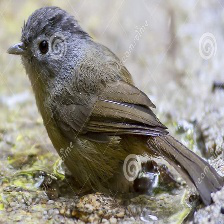

In [5]:
for index,row in df.iterrows():
    print(row['filepaths'])
    break
im = Image.open('../input/100-bird-species/train/ABBOTTS BABBLER/001.jpg')
im

**From the main dataframe extracting train dataset samples**

In [6]:
temp=df.loc[df['data set']=='train']
print(temp.shape)
temp.head()

(58388, 4)


,class index,filepaths,labels,data set
0,0,../input/100-bird-species/train/ABBOTTS BABBLE...,ABBOTTS BABBLER,train
1,0,../input/100-bird-species/train/ABBOTTS BABBLE...,ABBOTTS BABBLER,train
2,0,../input/100-bird-species/train/ABBOTTS BABBLE...,ABBOTTS BABBLER,train
3,0,../input/100-bird-species/train/ABBOTTS BABBLE...,ABBOTTS BABBLER,train
4,0,../input/100-bird-species/train/ABBOTTS BABBLE...,ABBOTTS BABBLER,train


**Train Dataset contains 58388 images belonging to 400 different classes**

**Preparing data to count number of samples belonging to each class**

In [7]:
temp['class index'] = temp['class index'].astype(int)
label_count=[]
class_name=[]
for i in tqdm(range(400)):
    res=temp.loc[temp['class index']==i]
    label_count.append(res.shape[0])
    class_name.append(i)

100%|██████████| 400/400 [00:00<00:00, 2949.39it/s]


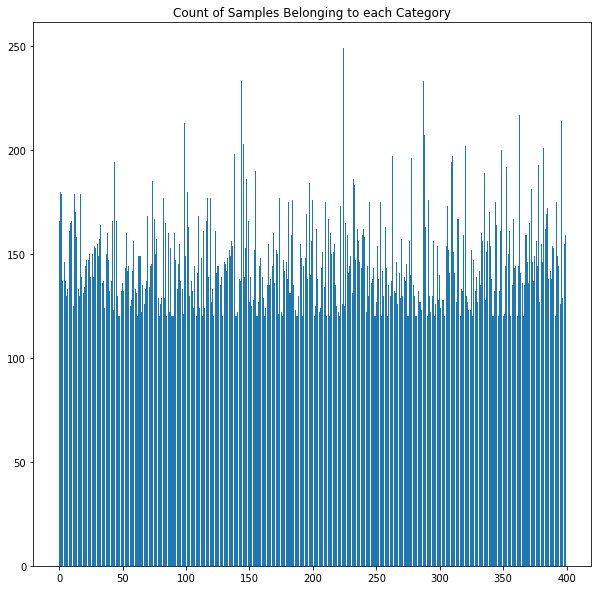

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
plt.bar(class_name,label_count)
plt.title('Count of Samples Belonging to each Category')
plt.show()

**From the above plot it is clear that dataset is imbalanced as number of samples belonging to each category is different. Also it is clear that every category has minimum of 100-120 samples.**

**Storing dimensions of training images**

In [9]:
import cv2
ht=[]
wt=[]
for index,row in tqdm(temp.iterrows()):
    img = cv2.imread(row['filepaths'], cv2.IMREAD_UNCHANGED)
    ht.append(img.shape[0])
    wt.append(img.shape[1])
    

58388it [07:50, 124.16it/s]


**Let us Visualize height and width of Images**

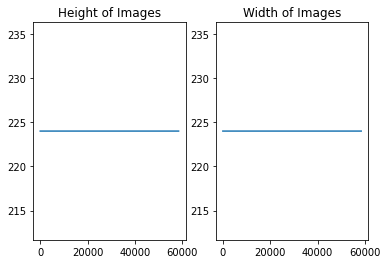

In [13]:
plt.subplot(1, 2, 1)
plt.title('Height of Images')
plt.plot(ht)
plt.subplot(1, 2, 2)
plt.title('Width of Images')
plt.plot(wt)
plt.show()

**As per dataset description all images are of size 224 * 224 and from the above plots also it is clear that dimensions of images are 224 * 224**

**Analysis on Validation and Test Datasets**

In [14]:
valid_df=df.loc[df['data set']=='valid']
test_df=df.loc[df['data set']=='test']
print(valid_df.shape,test_df.shape)

(2000, 4) (2000, 4)


**There are 2000 images from both test and validation datasets and as per dataset description 5 images from each category.**

**Visualize dimensions of images of test and validation datasets**

In [15]:
ht_v=[]
wt_v=[]
ht_t=[]
wt_t=[]
for index,row in tqdm(valid_df.iterrows()):
    img = cv2.imread(row['filepaths'], cv2.IMREAD_UNCHANGED)
    ht_v.append(img.shape[0])
    wt_v.append(img.shape[1])
for index,row in tqdm(test_df.iterrows()):
    img = cv2.imread(row['filepaths'], cv2.IMREAD_UNCHANGED)
    ht_t.append(img.shape[0])
    wt_t.append(img.shape[1])

2000it [00:22, 87.66it/s]
2000it [00:19, 100.14it/s]


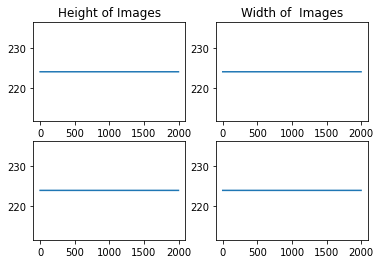

In [17]:
plt.subplot(2, 2, 1)
plt.title('Height of Images')
plt.plot(ht_v)
plt.subplot(2, 2, 2)
plt.title('Width of  Images')
plt.plot(wt_v)
plt.subplot(2, 2, 3)
plt.plot(ht_t)
plt.subplot(2, 2, 4)
plt.plot(wt_t)
plt.show()


**From the above plots also it is clear that both test and validation datasets have images of 224 * 224**

**Preparing Data Pipelines using Flow_from_Dataframe. We will use only 2 columns filepaths and labels and as per the documentation column names must be filename and class hence renaming of columns is required.**

In [18]:
# Training Data generator
train_df=df.loc[df['data set']=='train']
train_df1=train_df[['filepaths','labels']]
train_df1.rename(columns = {'filepaths':'filename','labels':'class'}, inplace = True)
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_gen = ImageFlow.flow_from_dataframe(dataframe=train_df1,target_size=(64,64),seed=10,batch_size=128)

Found 58388 validated image filenames belonging to 400 classes.


In [39]:
# Validation Data Generator
valid_df=df.loc[df['data set']=='valid']
valid_df1=valid_df[['filepaths','labels']]
valid_df1.rename(columns = {'filepaths':'filename','labels':'class'}, inplace = True)
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_gen = ImageFlow.flow_from_dataframe(dataframe=valid_df1,target_size=(64,64),seed=10,batch_size=128,shuffle=False)

Found 2000 validated image filenames belonging to 400 classes.


In [40]:
# Test Data Generator
test_df=df.loc[df['data set']=='test']
test_df1=test_df[['filepaths','labels']]
test_df1.rename(columns = {'filepaths':'filename','labels':'class'}, inplace = True)
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator()
test_gen = ImageFlow.flow_from_dataframe(dataframe=test_df1,target_size=(64,64),seed=10,batch_size=128,shuffle=False)

Found 2000 validated image filenames belonging to 400 classes.


**Simple CNN model**

In [41]:
tf.keras.backend.clear_session()

input_layer = Input(shape=(64,64,3))
conv1 = Conv2D(filters=128,kernel_size=(3,3), padding='same',activation="relu",use_bias=True)(input_layer)
mpool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = Conv2D(filters=64,kernel_size=(3,3), padding='same',activation="relu",use_bias=True)(mpool1)
mpool2 = MaxPooling2D(pool_size=(2,2))(conv2)
flat = Flatten()(mpool2)
dense = Dense(units=128,activation="relu",kernel_initializer="he_uniform")(flat)
output_layer = Dense(units=400,activation="softmax")(dense)

model = Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               209728

In [23]:
c1=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3, min_delta=0.01)

In [42]:
history = model.fit(train_gen,steps_per_epoch=len(train_gen),validation_data=validation_gen,validation_steps=len(validation_gen),epochs=20,callbacks=[c1])

Epoch 1/20
457/457 [==============================] - 110s 240ms/step - loss: 5.0977 - accuracy: 0.0622 - val_loss: 3.8804 - val_accuracy: 0.1765
Epoch 2/20
457/457 [==============================] - 106s 232ms/step - loss: 3.5967 - accuracy: 0.2424 - val_loss: 3.0590 - val_accuracy: 0.3235
Epoch 3/20
457/457 [==============================] - 106s 231ms/step - loss: 2.9963 - accuracy: 0.3470 - val_loss: 2.6116 - val_accuracy: 0.4085
Epoch 4/20
457/457 [==============================] - 106s 232ms/step - loss: 2.6453 - accuracy: 0.4123 - val_loss: 2.4695 - val_accuracy: 0.4370
Epoch 5/20
457/457 [==============================] - 108s 237ms/step - loss: 2.4151 - accuracy: 0.4523 - val_loss: 2.2687 - val_accuracy: 0.4710
Epoch 6/20
457/457 [==============================] - 108s 235ms/step - loss: 2.2280 - accuracy: 0.4908 - val_loss: 2.2129 - val_accuracy: 0.4860
Epoch 7/20
457/457 [==============================] - 110s 240ms/step - loss: 2.0841 - accuracy: 0.5185 - val_loss: 2.1674 -

**Visualizing Loss and Accuarcy**

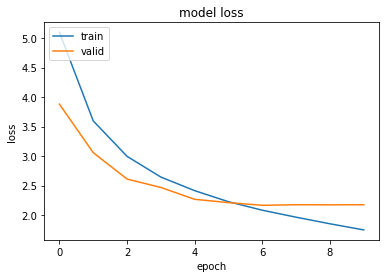

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

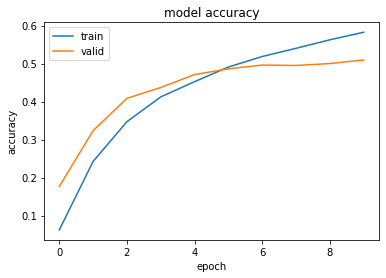

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

**Evaluation and Predictions of test set**

In [45]:
model.evaluate(test_gen)

16/16 [==============================] - 3s 209ms/step - loss: 458.1331 - accuracy: 0.3845


[458.133056640625, 0.38449999690055847]